In [78]:
%matplotlib inline
import numpy as N
import matplotlib.pyplot as P
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from astropy.table import Table, Column, MaskedColumn

# Figure 1 - image mosaic

Figure 1 is a mosaic of randomly chosen galaxy images from the sample used in the paper. For interactivity, when clicking on one of the images, the reader can be directed to the source of the image on the telescope website via the links in the following csv file:

In [79]:
image_links = Table.read('./data/figure1_sdss_url.csv', format='csv')
image_links.pprint()

                                   SDSS_URL                                   ...
----------------------------------------------------------------------------- ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237665565001187452 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237665226239311902 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237671262283300978 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237667734529835345 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237655342972534909 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237654641284087938 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237665329857953901 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237655129836552255 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237654875895758883 ...
http://skyserver.sdss.org/dr9/en/tools/explore/obj.asp?id=1237648720689954909 ...


To produce this figure, the images need to be downloaded using wget...

In [80]:
import wget
for n in range(len(image_links)):
    url = 'http://skyservice.pha.jhu.edu/DR8/ImgCutout/getjpeg.aspx?ra='+str(image_links['RA'][n])+'&dec='+str(image_links['DEC'][n])+'&scale=0.099183&width=424&height=424'
    savename = './data/'+str(int(image_links['SDSS_ID'][n]))+'.jpeg'
    f = wget.download(url, out=savename)

Then once the images are obtained, the figure can be made with the following code:

In [81]:
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
font = {'family':'serif', 'size':20}
P.rc('font', **font)
P.rc('xtick', labelsize='small', c='k')
P.rc('ytick', labelsize='small', c='k')
P.rc('axes', labelsize='small', ec='w')

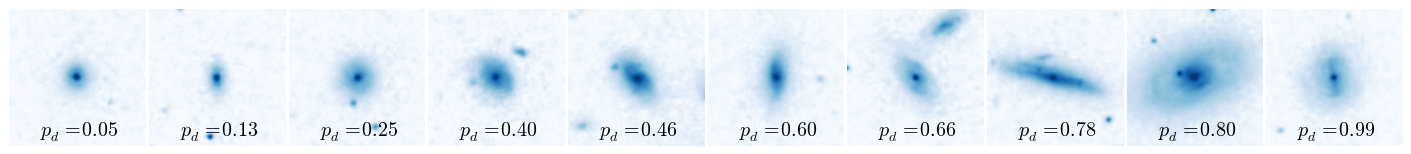

In [82]:
F = P.figure(1, (20,10), frameon=False, edgecolor='None')
grid= ImageGrid(F, 111, nrows_ncols = (1,10), axes_pad=0.0)
for n in range(len(image_links)):
    img = mpimg.imread('./data/'+str(int(image_links['SDSS_ID'][9-n]))+'.jpeg')
    grid[n].imshow(img[:,:,0], extent=[0,424,0,424], cmap=P.cm.Blues)
    grid[n].tick_params(axis='x', labelbottom='off', labeltop='off', bottom='off', top='off')
    grid[n].tick_params(axis='y', labelleft='off', labelright='off', left='off', right='off')
    grid[n].text(100, 30, r'$p_d = %3.2f$' % image_links['pd'][9-n], color='k')
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('figure1.pdf')

# Figure 2 - diagram to split the sample

Figure 2 uses a diagnostic diagram to split the sample into galaxies with inactive and active black holes. If required, the plot could be made interactive by hovering over a point and showing its values and designation of either 'AGN' or 'INACTIVE'. 

There are six lines plotted across 3 panels in order to split the sample, for which the equations are provided below:

The first two are plotted in the first panel of Figure 2

In [83]:
P.rcParams.update(P.rcParamsDefault)
%matplotlib inline

x = N.linspace(-2,0, 20)
y = (0.61/(x-0.05)) + 1.3
x1 = N.linspace(-2,0.4, 20)
y1 = (0.61/(x1-0.47))+1.19

The next two are plotted in the second panel of Figure 2

In [84]:
x2 = N.linspace(-2, 0.1, 20)
y2 = (0.72/(x2 -0.32))+1.3
sx1 = N.linspace(-0.3, 1, 20)
sy1 = 1.89*sx1 + 0.76

These two are plotted in the third and final panel of Figure 2

In [85]:
x3 = N.linspace(-2.5, -0.75, 20)
y3 = (0.73/(x3+0.59))+1.33
sx2 = N.linspace(-1.1, 0, 20)
sy2 = 1.18*sx2 + 1.30

The data for Figure 2 is provided in the FITS files which are loaded below using the astropy python package.

In [86]:
da = Table.read('./data/figure2_data.fits', format='fits')

This includes all the galaxies in the sample which have the measurements we need for the diagnostic diagram. So first we have to figure out which are the active galaxies; the 'Seyferts', or seyf as the variable is called below.

In [87]:
agn2_1 = da[N.where(0.73/(N.log10(da['oi_6300_flux']/da['h_alpha_flux'])+0.59) + 1.33 < N.log10(da['oiii_5007_flux']/da['h_beta_flux']))]
agn2_2 = agn2_1[N.where(0.61/(N.log10(agn2_1['nii_6584_flux']/agn2_1['h_alpha_flux'])-0.47) + 1.19 < N.log10(agn2_1['oiii_5007_flux']/agn2_1['h_beta_flux']))]
agn2 = agn2_2[N.where(0.72/(N.log10((agn2_2['sii_6717_flux']+agn2_2['sii_6731_flux'])/agn2_2['h_alpha_flux'])-0.32) + 1.33 < N.log10(agn2_2['oiii_5007_flux']/agn2_2['h_beta_flux']))]
idx_liner = N.logical_or(1.18*N.log10(agn2['oi_6300_flux']/agn2['h_alpha_flux']) + 1.3 > N.log10(agn2['oiii_5007_flux']/agn2['h_beta_flux']), 1.89*N.log10((agn2['sii_6717_flux']+agn2['sii_6731_flux'])/agn2['h_alpha_flux']) + 0.76 > N.log10(agn2['oiii_5007_flux']/agn2['h_beta_flux']))
liner = agn2[idx_liner]
seyf = agn2[N.invert(idx_liner)]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


Now we can plot the data with the equations defined above and the data we loaded before

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in log10


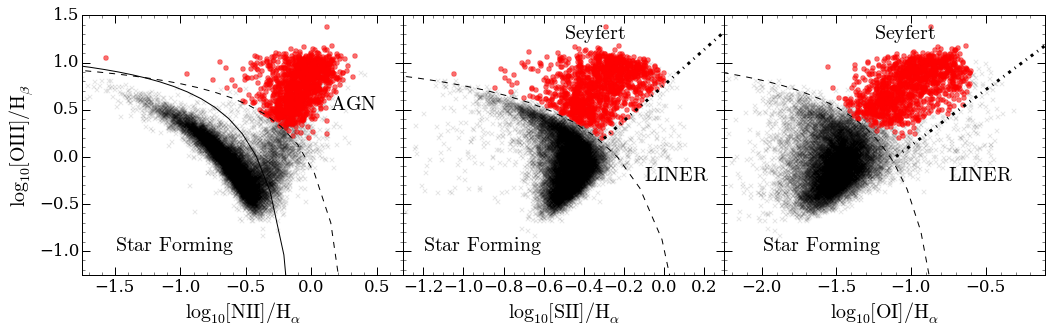

In [88]:
font = {'family':'serif', 'size':20}
P.rc('font', **font)
P.rc('xtick', labelsize='small')
P.rc('ytick', labelsize='small')
P.rc('axes', labelsize='medium')

P.figure(figsize=(15,5))
#This is the first panel of Figure 2
ax1 = P.subplot(131)
ax1.scatter(N.log10(da['nii_6584_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha =0.1, marker='x', color='k')
ax1.scatter(N.log10(seyf['nii_6584_flux']/seyf['h_alpha_flux']), N.log10(seyf['oiii_5007_flux']/seyf['h_beta_flux']), alpha =0.5, marker='o', color='r')
ax1.plot(x, y, c='k', linestyle='solid')
ax1.plot(x1, y1, c='k', linestyle='dashed')
ax1.set_xlim(-1.75,0.7)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.5, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(0.5, 0.5, r'$\rm{AGN}$', ha='right')
ax1.set_ylabel(r'$\rm{log}_{10}[OIII]/H_{\beta}$')
ax1.set_xlabel(r'$\rm{log}_{10}[NII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
# This is the second panel of Figure 2
ax1 = P.subplot(132)
ax1.scatter(N.log10((da['sii_6717_flux']+da['sii_6731_flux'])/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.scatter(N.log10((seyf['sii_6717_flux']+seyf['sii_6731_flux'])/seyf['h_alpha_flux']), N.log10(seyf['oiii_5007_flux']/seyf['h_beta_flux']), alpha=0.5, marker='o', color='r')
ax1.plot(x2, y2, c='k', linestyle='dashed')
ax1.plot(sx1, sy1, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-1.3,0.3)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-1.2, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.set_xlabel(r'$\rm{log}_{10}[SII]/H_{\alpha}$')
ax1.minorticks_on()
ax1.tick_params('y', labelleft='off')
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
ax1.text(-0.5, 1.25, r'$\rm{Seyfert}$')
ax1.text(-0.1, -0.25, r'$\rm{LINER}$')

# This is the third panel of Figure 2
ax1 = P.subplot(133)
ax1.scatter(N.log10(da['oi_6300_flux']/da['h_alpha_flux']), N.log10(da['oiii_5007_flux']/da['h_beta_flux']), alpha=0.1, marker='x', color='k')
ax1.scatter(N.log10(seyf['oi_6300_flux']/seyf['h_alpha_flux']), N.log10(seyf['oiii_5007_flux']/seyf['h_beta_flux']), alpha =0.5, marker='o', color='r')
ax1.plot(x3, y3, c='k', linestyle='dashed')
ax1.plot(sx2, sy2, c='k', linestyle='-.', linewidth=3)
ax1.set_xlim(-2.25,-0.1)
ax1.set_ylim(-1.25, 1.5)
ax1.text(-2.0, -1.0, r'$\rm{Star}$ $\rm{Forming}$')
ax1.text(-1.25, 1.25, r'$\rm{Seyfert}$')
ax1.text(-0.75, -0.25, r'$\rm{LINER}$')
ax1.set_xlabel(r'$\rm{log}_{10}[OI]/H_{\alpha}$')
ax1.tick_params('y', labelleft='off')
ax1.minorticks_on()
ax1.tick_params('both', which='major', length=8, width=1)
ax1.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.subplots_adjust(wspace=0.0)
P.savefig('figure2.pdf', frameon=False, bbox_inches='tight', pad_inches=0.1, transparent=True)

# Figure 3 - SFRs, masses and colours

Figure 3 has two panels, with panel (a) showing the colour against the magnitude of the galaxies, and panel (b) showing the star formation rate against the stellar mass. If required, an interactive plot could provide the values of the red points when hovered over (note that this will probably not be possible with the contoured data of a large 900,000+ galaxy sample) and give a classification of either in (a) 'red', 'green' or 'blue' and in (b) 'star forming', 'quenching' or 'quiescent'. 

These classifications are determined by the diagnostic lines in each panel for which the equations are provided below. The first cell changes some of the matplotlib defaults so that the plot will look the same as it does in the paper. You can ignore this code block. 

In [89]:
import os
from plothist2d import plothist2d
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

P.rc('figure', facecolor='none', edgecolor='none', autolayout=True)
P.rc('path', simplify=True)
P.rc('text', usetex=True)
P.rc('font', family='serif')
P.rc('axes', labelsize='large', facecolor='none', linewidth=0.7, color_cycle = ['k', 'r', 'g', 'b', 'c', 'm', 'y'])
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
P.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
P.rc('savefig', facecolor='none', edgecolor='none', frameon='False')

params =   {'font.size' : 20,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
P.rcParams.update(params) 

In [90]:
agn = Table.read('./data/agn_galaxies.fits', format='fits')
inac = Table.read('./data/inactive_galaxies.fit', format='fits')
#sdss = Table.read('./data/all_sdss_galaxies.fit', format='fits')

Now we have all the sample galaxy data loaded we can bin it in 2 dimensions, firstly the inactive galaxies for both the mass-sfr and colour-magnitude planes:

In [91]:
Hi, Xi, Yi = N.histogram2d(inac['AVG_MASS'], inac['AVG_SFR'], bins=30, range=((8,12.5),(-2,2)), normed=True)
Hic, Xic, Yic = N.histogram2d(inac['MR'], inac['MU']-inac['MR'], bins=30, range=((-24,-18),(0.5,3.5)), normed=True)

Then, as a comparison, load the already contoured data for all galaxies in the SDSS galaxy survey, firstly in the sfr-mass plane and then from Baldry et al. (2003) for the colour-magnitude plane.  

In [92]:
Hs = N.load('./data/all_sdss_hist_data.npy')
Xs = N.load('./data/all_sdss_x_hist_data.npy')
Ys = N.load('./data/all_sdss_y_hist_data.npy')

In [93]:
Z = N.genfromtxt('./data/baldry_hist_data.txt')
X = N.genfromtxt('./data/baldry_x_hist.txt')
Y = N.genfromtxt('./data/baldry_y_hist.txt')

Now we also need to define the diagnostic line in the sfr-mass plane. Anything with agn['AVG_SFR'] > sfr_138-0.3 is classed as 'star forming', anything with sfr_138-1.5 < agn['AVG_SFR'] < sfr_138-0.3 is classed as 'quenching' and anything with agn['AVG_SFR'] < sfr_138-1.5 is classed as 'quenched'.

In [94]:
def peng_sfr(m,t):
    return (2.5*((m/10**10)**(-0.1))*((t/3.5)**(-2.2)))*(ms/1E9)

ms = N.linspace(1E8, 1E12, 51)
#sfr_138 = N.log10(peng_sfr(ms, cosmo.age(0).value))
sfr_138 = 0.857*N.log10(ms) - 8.4

We also need a diagnostic in the colour-magnitude plane which is defined below. Anything with agn['MU_MR'] > upper is classed as 'red', anything with lower < agn['AVG_SFR'] < upper is classed as 'green' and anything with agn['AVG_SFR'] < lower is classed as 'blue'. 

In [95]:
Mrs = N.linspace(-24.5, -17, 200)
C_dash = 2.06 - 0.244*N.tanh((Mrs + 20.07)/1.09)
upper = C_dash + 0.128
lower = C_dash - 0.128

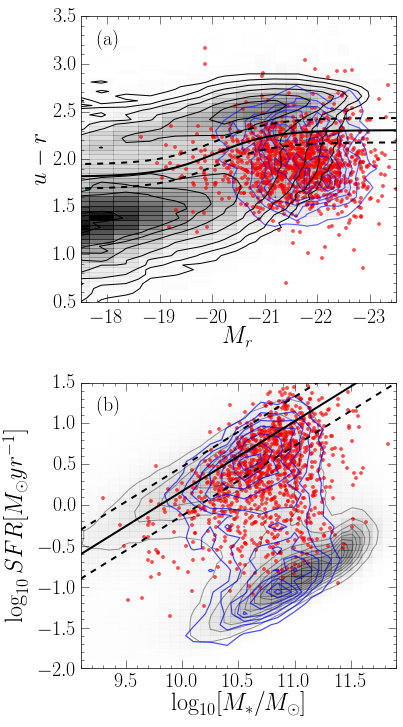

In [96]:
P.figure(figsize=(6 ,10.5))

# First let's plot the colour-magnitude plane in figure3(a)
ax1 = P.subplot(211, aspect='auto', adjustable='box')
ax1.plot(Mrs, C_dash, color='k', linewidth=2)
ax1.plot(Mrs, upper, color='k', linestyle='dashed', linewidth=2)
ax1.plot(Mrs, lower, color='k', linestyle='dashed', linewidth=2)
ax1.contour(Xic[:-1], Yic[:-1], Hic.T, colors='b', alpha=0.6, linewidths=1.2)
ax1.pcolor(Xic[:-1], Yic[:-1], Hic.T, cmap=P.cm.binary, linestyle='dashed', alpha=0.3)
plothist2d(Z.T, X, Y, ax=ax1, plot_contours=True, alpha=0.5, plot_datapoints=False, levels=[80, 160, 320, 640, 1280, 1920, 2560, 5120])
ax1.scatter(agn['MR'], agn['MU_MR'], marker='o', color='r', alpha=0.6, s=8)
ax1.set_xlabel(r'$M_r$')
ax1.set_ylabel(r'$u-r$')
ax1.set_xlim(-17.5, -23.5)
ax1.set_ylim(0.5,3.5)
ax1.text(0.05, 0.9, r'$\rm{(a)}$', ha ='left', transform=ax1.transAxes)
ax1.minorticks_on()

# Now let's plot the sfr-mass plane in figure 3(b)
ax1 = P.subplot(212, aspect='auto', adjustable='box')
ax1.pcolor(Xs[:-1], Ys[:-1], Hs.T, cmap=P.cm.binary, alpha=0.5)
ax1.contour(Xs[:-1], Ys[:-1], Hs.T, 10, colors='k', alpha=0.4)
ax1.contour(Xi[:-1], Yi[:-1], Hi.T, colors='b', alpha=0.7, linewidths=1.2)
ax1.plot(N.log10(ms), sfr_138, linestyle='solid', color='k', linewidth=2)
ax1.plot(N.log10(ms), sfr_138-0.3, linestyle='dashed', color='k', linewidth=2)
ax1.plot(N.log10(ms), sfr_138+0.3, linestyle='dashed', color='k', linewidth=2)
ax1.scatter(agn['AVG_MASS'], agn['AVG_SFR'], marker='o', color='r', alpha=0.6, s=8)
ax1.set_xlabel(r'$\log_{10}[M_*/M_{\odot}]$')
ax1.set_ylabel(r'$\log_{10} SFR [M_{\odot} yr^{-1}]$')
ax1.set_xlim(9.1, 11.9)
ax1.set_ylim(-2,1.5)
ax1.text(0.05, 0.9, r'$\rm{(b)}$', ha ='left', transform=ax1.transAxes)
ax1.minorticks_on()

P.savefig('figure3.pdf', bbox_inches='tight')

### Figure 4 - histograms, histograms, histograms

In Figure 4 there are 6 panels, each with two histograms shown by the solid and dashed lines which are loaded from a single file. The shaded areas correspond to the error on the histograms in a given bin and are also loaded as single files. Upon hover, the interactive plot could show the histogram value at that bin and also give the ± error at that point. 

Each histogram is normalised. 

First let's set some plotting parameters and define our bins (Xs)...

In [97]:
from mpl_toolkits.axes_grid1 import ImageGrid
import glob
P.rcParams.update(P.rcParamsDefault)
%matplotlib inline
font = {'family':'serif', 'size':20}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium', lw=3, facecolor='None', edgecolor='k')


X = N.linspace(0, 14, 100)
Xs = X[:-1] + N.diff(X)

Now let's load the AGN galaxy histograms for the right hand panels...

In [98]:
xslastq = N.load('./data/low_mass_agn_smooth_tq_sum_bootstrap_all_0.npy')
xsladtq = N.load('./data/low_mass_agn_disc_tq_sum_bootstrap_all_0.npy')
xsmastq = N.load('./data/med_mass_agn_smooth_tq_sum_bootstrap_all_0.npy')
xsmadtq = N.load('./data/med_mass_agn_disc_tq_sum_bootstrap_all_0.npy')
xshastq = N.load('./data/high_mass_agn_smooth_tq_sum_bootstrap_all_0.npy')
xshadtq = N.load('./data/high_mass_agn_disc_tq_sum_bootstrap_all_0.npy')

And now the inactive galaxy histograms for the left hand panels...

In [99]:
xslistq = N.load('./data/low_mass_inactive_smooth_tq_sum_bootstrap_all_0.npy')
xslidtq = N.load('./data/low_mass_inactive_disc_tq_sum_bootstrap_all_0.npy')
xsmistq = N.load('./data/med_mass_inactive_smooth_tq_sum_bootstrap_all_0.npy')
xsmidtq = N.load('./data/med_mass_inactive_disc_tq_sum_bootstrap_all_0.npy')
xshistq = N.load('./data/high_mass_inactive_smooth_tq_sum_bootstrap_all_0.npy')
xshidtq = N.load('./data/high_mass_inactive_disc_tq_sum_bootstrap_all_0.npy')

And finally the minimum and maximum histograms that bound the shaded regions for both the AGN and inactive galaxies... 

In [100]:
maxxsla = N.load('./data/low_mass_agn_smooth_tq_max_error.npy')
minxsla = N.load('./data/low_mass_agn_smooth_tq_min_error.npy')
maxxdla = N.load('./data/low_mass_agn_disc_tq_max_error.npy')
minxdla = N.load('./data/low_mass_agn_disc_tq_min_error.npy')
maxxsma = N.load('./data/med_mass_agn_smooth_tq_max_error.npy')
minxsma = N.load('./data/med_mass_agn_smooth_tq_min_error.npy')
maxxdma = N.load('./data/med_mass_agn_disc_tq_max_error.npy')
minxdma = N.load('./data/med_mass_agn_disc_tq_min_error.npy')
maxxsha = N.load('./data/high_mass_agn_smooth_tq_max_error.npy')
minxsha = N.load('./data/high_mass_agn_smooth_tq_min_error.npy')
maxxdha = N.load('./data/high_mass_agn_disc_tq_max_error.npy')
minxdha = N.load('./data/high_mass_agn_disc_tq_min_error.npy')
maxxsli = N.load('./data/low_mass_inactive_smooth_tq_max_error.npy')
minxsli = N.load('./data/low_mass_inactive_smooth_tq_min_error.npy')
maxxdli = N.load('./data/low_mass_inactive_disc_tq_max_error.npy')
minxdli = N.load('./data/low_mass_inactive_disc_tq_min_error.npy')
maxxsmi = N.load('./data/med_mass_inactive_smooth_tq_max_error.npy')
minxsmi = N.load('./data/med_mass_inactive_smooth_tq_min_error.npy')
maxxdmi = N.load('./data/med_mass_inactive_disc_tq_max_error.npy')
minxdmi = N.load('./data/med_mass_inactive_disc_tq_min_error.npy')
maxxshi = N.load('./data/high_mass_inactive_smooth_tq_max_error.npy')
minxshi = N.load('./data/high_mass_inactive_smooth_tq_min_error.npy')
maxxdhi = N.load('./data/high_mass_inactive_disc_tq_max_error.npy')
minxdhi = N.load('./data/high_mass_inactive_disc_tq_min_error.npy')

Now let's plot Figure 4... 

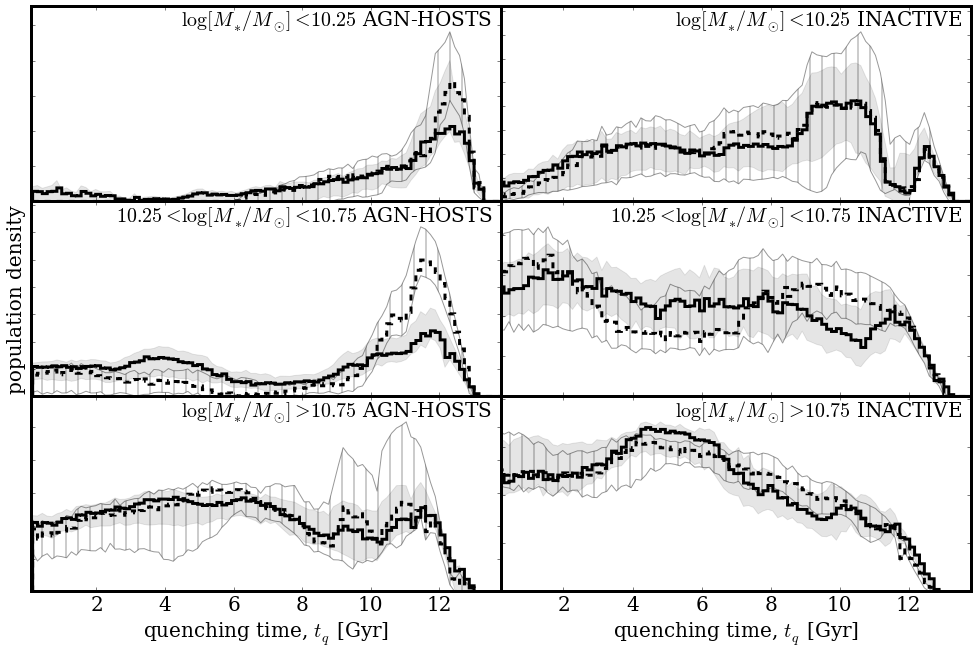

In [101]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(14,9.5), edgecolor='None', facecolor='None')

ax1 = P.subplot2grid((3,2), (0,0))
ax1.fill_between(Xs, y1=minxsla, y2=maxxsla, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax1.fill_between(Xs, y1=minxdla, y2=maxxdla, color='k', alpha=0.1)
ax1.hist(Xs, weights = xslastq/N.sum(xslastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax1.hist(Xs, weights = xsladtq/N.sum(xsladtq), bins=Xs, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.1, 13.8)
ax1.tick_params('x', labelbottom='off')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxxdla, maxxsla]))
ax1.text(0.98, 0.9, r'$\log[M_*/M_{\odot}] < 10.25$ AGN-HOSTS', ha='right', transform=ax1.transAxes)

ax2 = P.subplot2grid((3,2), (1,0))
ax2.fill_between(Xs, y1=minxsma, y2=maxxsma, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax2.fill_between(Xs, y1=minxdma, y2=maxxdma, color='k', alpha=0.1)
ax2.hist(Xs, weights = xsmastq/N.sum(xsmastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax2.hist(Xs, weights = xsmadtq/N.sum(xsmadtq), bins=Xs, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.1, 13.8)
ax2.set_ylim(0, 1.15*N.max([maxxdma, maxxsma]))
ax2.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ AGN-HOSTS', ha='right', transform=ax2.transAxes)
ax2.tick_params('x', labelbottom='off')
ax2.tick_params('y', labelleft='off')
ax2.set_ylabel('population density')

ax3 = P.subplot2grid((3,2), (2,0))
ax3.fill_between(Xs, y1=minxsha, y2=maxxsha, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax3.fill_between(Xs, y1=minxdha, y2=maxxdha, color='k', alpha=0.1)
ax3.hist(Xs, weights = xshastq/N.sum(xshastq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax3.hist(Xs, weights = xshadtq/N.sum(xshadtq), bins=Xs, histtype='step', color='k', lw = 3)
ax3.set_xlim(0.1, 13.8)
ax3.set_ylim(0, 1.15*N.max([maxxdha, maxxsha]))
ax3.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ AGN-HOSTS', ha ='right', transform=ax3.transAxes)
ax3.set_xlabel(r'quenching time, $t_q$ [Gyr]')
ax3.tick_params('y', labelleft='off')

ax4 = P.subplot2grid((3,2), (0,1))
ax4.fill_between(Xs, y1=minxsli, y2=maxxsli, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax4.fill_between(Xs, y1=minxdli, y2=maxxdli, color='k', alpha=0.1)
ax4.hist(Xs, weights = xslistq/N.sum(xslistq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax4.hist(Xs, weights = xslidtq/N.sum(xslidtq), bins=Xs, histtype='step', color='k', lw = 3)
ax4.set_xlim(0.2, 13.8)
ax4.set_ylim(0, 1.15*N.max([maxxdli, maxxsli]))
ax4.tick_params('both', labelbottom='off', labelleft='off')
ax4.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] < 10.25$ INACTIVE', ha ='right', transform=ax4.transAxes)


ax5 = P.subplot2grid((3,2), (1,1))
ax5.fill_between(Xs, y1=minxsmi, y2=maxxsmi, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax5.fill_between(Xs, y1=minxdmi, y2=maxxdmi, color='k', alpha=0.1)
ax5.hist(Xs, weights = xsmistq/N.sum(xsmistq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax5.hist(Xs, weights = xsmidtq/N.sum(xsmidtq), bins=Xs, histtype='step', color='k', lw = 3)
ax5.set_xlim(0.2, 13.8)
ax5.set_ylim(0, 1.15*N.max([maxxdmi, maxxsmi]))
ax5.tick_params('both', labelbottom='off', labelleft='off')
ax5.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ INACTIVE', ha='right', transform=ax5.transAxes)

ax6 = P.subplot2grid((3,2), (2,1))
ax6.fill_between(Xs, y1=minxshi, y2=maxxshi, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax6.fill_between(Xs, y1=minxdhi, y2=maxxdhi, color='k', alpha=0.1)
ax6.hist(Xs, weights = xshistq/N.sum(xshistq), bins=Xs, histtype='step', color='k', linestyle='dashed', lw = 3)
ax6.hist(Xs, weights = xshidtq/N.sum(xshidtq), bins=Xs, histtype='step', color='k', lw = 3)
ax6.set_xlim(0.2, 13.8)
ax6.set_ylim(0, 1.15*N.max([maxxdhi, maxxshi]))
ax6.set_xlabel(r'quenching time, $t_q$ [Gyr]')
ax6.tick_params('y', labelleft='off')
ax6.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ INACTIVE', ha ='right', transform=ax6.transAxes)

P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('figure4.pdf', edgecolor='None', facecolor='None')

### Figure 5 - more histograms, histograms, histograms... 

Now we do the exact same thing for Figure 5, this time with the y variable, tau...

In [102]:
Y = N.linspace(0, 4, 100)
Ys = Y[:-1] + N.diff(Y)

In [103]:
yslastau = N.load('./data/low_mass_agn_smooth_tau_sum_bootstrap_all_0.npy')
ysladtau = N.load('./data/low_mass_agn_disc_tau_sum_bootstrap_all_0.npy')
ysmastau = N.load('./data/med_mass_agn_smooth_tau_sum_bootstrap_all_0.npy')
ysmadtau = N.load('./data/med_mass_agn_disc_tau_sum_bootstrap_all_0.npy')
yshastau = N.load('./data/high_mass_agn_smooth_tau_sum_bootstrap_all_0.npy')
yshadtau = N.load('./data/high_mass_agn_disc_tau_sum_bootstrap_all_0.npy')

In [104]:
yslistau = N.load('./data/low_mass_inactive_smooth_tau_sum_bootstrap_all_0.npy')
yslidtau = N.load('./data/low_mass_inactive_disc_tau_sum_bootstrap_all_0.npy')
ysmistau = N.load('./data/med_mass_inactive_smooth_tau_sum_bootstrap_all_0.npy')
ysmidtau = N.load('./data/med_mass_inactive_disc_tau_sum_bootstrap_all_0.npy')
yshistau = N.load('./data/high_mass_inactive_smooth_tau_sum_bootstrap_all_0.npy')
yshidtau = N.load('./data/high_mass_inactive_disc_tau_sum_bootstrap_all_0.npy')

In [105]:
maxysla = N.load('./data/low_mass_agn_smooth_tau_max_error.npy')
minysla = N.load('./data/low_mass_agn_smooth_tau_min_error.npy')
maxydla = N.load('./data/low_mass_agn_disc_tau_max_error.npy')
minydla = N.load('./data/low_mass_agn_disc_tau_min_error.npy')
maxysma = N.load('./data/med_mass_agn_smooth_tau_max_error.npy')
minysma = N.load('./data/med_mass_agn_smooth_tau_min_error.npy')
maxydma = N.load('./data/med_mass_agn_disc_tau_max_error.npy')
minydma = N.load('./data/med_mass_agn_disc_tau_min_error.npy')
maxysha = N.load('./data/high_mass_agn_smooth_tau_max_error.npy')
minysha = N.load('./data/high_mass_agn_smooth_tau_min_error.npy')
maxydha = N.load('./data/high_mass_agn_disc_tau_max_error.npy')
minydha = N.load('./data/high_mass_agn_disc_tau_min_error.npy')
maxysli = N.load('./data/low_mass_inactive_smooth_tau_max_error.npy')
minysli = N.load('./data/low_mass_inactive_smooth_tau_min_error.npy')
maxydli = N.load('./data/low_mass_inactive_disc_tau_max_error.npy')
minydli = N.load('./data/low_mass_inactive_disc_tau_min_error.npy')
maxysmi = N.load('./data/med_mass_inactive_smooth_tau_max_error.npy')
minysmi = N.load('./data/med_mass_inactive_smooth_tau_min_error.npy')
maxydmi = N.load('./data/med_mass_inactive_disc_tau_max_error.npy')
minydmi = N.load('./data/med_mass_inactive_disc_tau_min_error.npy')
maxyshi = N.load('./data/high_mass_inactive_smooth_tau_max_error.npy')
minyshi = N.load('./data/high_mass_inactive_smooth_tau_min_error.npy')
maxydhi = N.load('./data/high_mass_inactive_disc_tau_max_error.npy')
minydhi = N.load('./data/high_mass_inactive_disc_tau_min_error.npy')

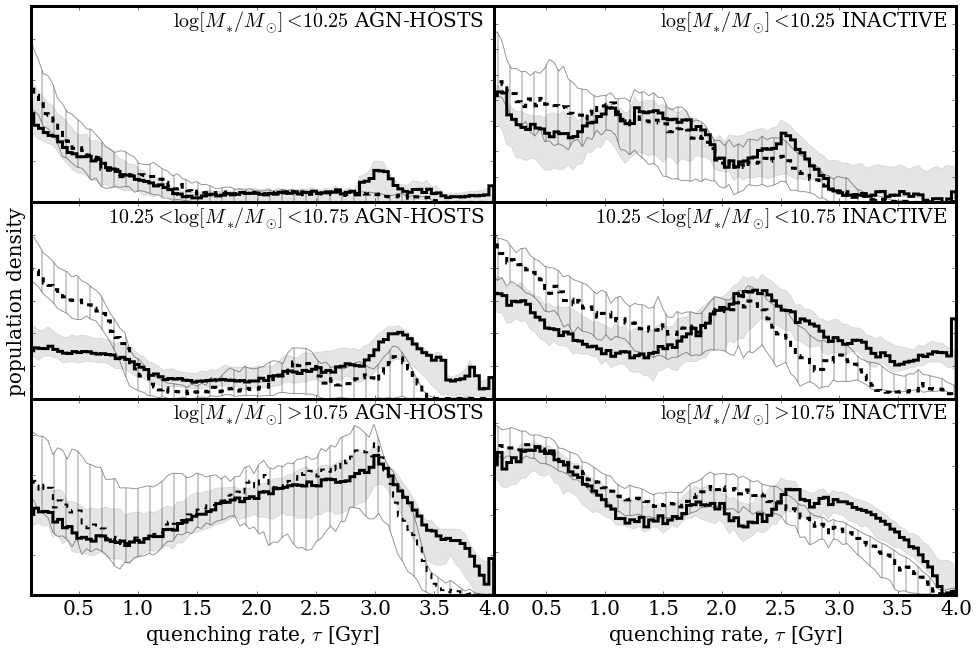

In [106]:
from mpl_toolkits.axes_grid1 import ImageGrid
F = P.figure(figsize=(14,9.5))
ax1 = P.subplot2grid((3,2), (0,0))
ax1.fill_between(Ys, y1=minysla, y2=maxysla, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax1.fill_between(Ys, y1=minydla, y2=maxydla, color='k', alpha=0.1)
ax1.hist(Ys, weights = yslastau/N.sum(yslastau), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax1.hist(Ys, weights = ysladtau/N.sum(ysladtau), bins=Ys, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.1, 4.0)
ax1.tick_params('x', labelbottom='off')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxysla, maxydla]))
ax1.text(0.98, 0.9, r'$\log[M_*/M_{\odot}] < 10.25$ AGN-HOSTS', ha='right', transform=ax1.transAxes)

ax2 = P.subplot2grid((3,2), (1,0))
ax2.fill_between(Ys, y1=minysma, y2=maxysma, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax2.fill_between(Ys, y1=minydma, y2=maxydma, color='k', alpha=0.1)
ax2.hist(Ys, weights = ysmastau/N.sum(ysmastau), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax2.hist(Ys, weights = ysmadtau/N.sum(ysmadtau), bins=Ys, histtype='step', color='k', lw = 3)
ax2.set_xlim(0.1, 4.0)
ax2.set_ylim(0, 1.15*N.max([maxydma, maxysma]))
ax2.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ AGN-HOSTS', ha='right', transform=ax2.transAxes)
ax2.tick_params('x', labelbottom='off')
ax2.tick_params('y', labelleft='off')
ax2.set_ylabel('population density')

ax3 = P.subplot2grid((3,2), (2,0))
ax3.fill_between(Ys, y1=minysha, y2=maxysha, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax3.fill_between(Ys, y1=minydha, y2=maxydha, color='k', alpha=0.1)
ax3.hist(Ys, weights = yshastau/N.sum(yshastau), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 2)
ax3.hist(Ys, weights = yshadtau/N.sum(yshadtau), bins=Ys, histtype='step', color='k', lw = 3)
ax3.set_xlim(0.1, 4.0)
ax3.set_ylim(0, 1.15*N.max([maxydha, maxysha]))
ax3.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ AGN-HOSTS', ha ='right', transform=ax3.transAxes)
ax3.set_xlabel(r'quenching rate, $\tau$ [Gyr]')
ax3.tick_params('y', labelleft='off')

ax4 = P.subplot2grid((3,2), (0,1))
ax4.fill_between(Ys, y1=minysli, y2=maxysli, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax4.fill_between(Ys, y1=minydli, y2=maxydli, color='k', alpha=0.1)
ax4.hist(Ys, weights = yslistau/N.sum(yslistau), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax4.hist(Ys, weights = yslidtau/N.sum(yslidtau), bins=Ys, histtype='step', color='k', lw = 3)
ax4.set_xlim(0.05, 4.0)
ax4.set_ylim(0, 1.15*N.max([maxysli, maxydli]))
ax4.tick_params('both', labelbottom='off', labelleft='off')
ax4.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] < 10.25$ INACTIVE', ha ='right', transform=ax4.transAxes)

ax5 = P.subplot2grid((3,2), (1,1))
ax5.fill_between(Ys, y1=minysmi, y2=maxysmi, color='None', hatch='|', edgecolor='k', alpha=0.4)
ax5.fill_between(Ys, y1=minydmi, y2=maxydmi, color='k', alpha=0.1)
ax5.hist(Ys, weights = ysmistau/N.sum(ysmistau), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax5.hist(Ys, weights = ysmidtau/N.sum(ysmidtau), bins=Ys, histtype='step', color='k', lw = 3)
ax5.set_xlim(0.05, 4.0)
ax5.set_ylim(0, 1.15*N.max([maxysmi, maxydmi]))
ax5.tick_params('both', labelbottom='off', labelleft='off')
ax5.text(0.98, 0.9, r'$10.25 < \log[M_*/M_{\odot}] < 10.75$ INACTIVE', ha='right', transform=ax5.transAxes)

ax6 = P.subplot2grid((3,2), (2,1))
ax6.fill_between(Ys, y1=minyshi, y2=maxyshi,color='None', hatch='|', edgecolor='k', alpha=0.4)
ax6.fill_between(Ys, y1=minydhi, y2=maxydhi, color='k', alpha=0.1)
ax6.hist(Ys, weights = yshistau/N.sum(yshistau), bins=Ys, histtype='step', color='k', linestyle='dashed', lw = 3)
ax6.hist(Ys, weights = yshidtau/N.sum(yshidtau), bins=Ys, histtype='step', color='k', lw = 3)
ax6.set_xlim(0.05, 4.0)
ax6.set_ylim(0, 1.15*N.max([maxydhi, maxyshi]))
ax6.set_xlabel(r'quenching rate, $\tau$ [Gyr]')
ax6.tick_params('y', labelleft='off')
ax6.text(0.98, 0.9,  r'$ \log[M_*/M_{\odot}] > 10.75$ INACTIVE', ha ='right', transform=ax6.transAxes)
             
             
P.tight_layout()
P.subplots_adjust(wspace=0.0, hspace=0.0)
P.savefig('figure5.pdf', edgecolor='None', facecolor='None')

# That's all folks!

That's all the figures made. Anymore questions feel free to ping me!